# Section 1.2 — Data in practice

This notebook contains the code examples from Section 1.2 in the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

## Note for Windows users

If you're on macOS or Linux you can ignore this section—skip to the next section **Data management with Pandas**.

File paths on Windows use the backslash character (`\`) as path separator,
while UNIX operating systems like Linux and macOS use forward slash separator `/` as path separator. 

If you you're on Windows you'll need to manually edit the code examples below to make them work by replacing all occurrences of "`/`" with "`\\`". The double backslash is required to get a literal backslash because the character `\` has special meaning as an escape character.

In [2]:
import os

if os.path.sep == "/":
    print("You're on a UNIX system (Linux or macOS).")
    print("Enjoy civilization!")
elif os.path.sep == "\\":
    print("You're on Windows so you should use \\ as path separator.")
    print("Replace any occurence of / (forward slash) in paths with \\\\ (double-backslash).")

You're on a UNIX system (Linux or macOS).
Enjoy civilization!


The current working directory is a path on your computer where this notebook is running.
The code cell below shows you can **get** you **c**urrent **w**orking **d**irectory.

In [3]:
os.getcwd()

'/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/notebooks'

You're in the `notebooks/` directory, which is inside the parent directory `noBSstatsnotebooks/`.

The datasets we'll be using in this notebook are located in the `datasets/` directory, which is sibling of the `notebooks/` directory, inside the parent `noBSstatsnotebooks/`. To access data file `minimal.csv` in the `datasets/` directory from the current directory, we must specify a path that includes the `..` directive (go to parent), then go into the `datasets` directory, then open the file `minimal.csv`.

This combination of "directions" for getting to the file will look different if you're on a Windows system or on a UNIX system. The code below shows the correct path you should access.

In [4]:
if os.path.sep == "/":
    # UNIX path separators
    path = "../datasets/minimal.csv"
else:
    # Windows path separators
    path = "..\\datasets\\minimal.csv"

print("The path to the file minimal.csv in the datasets/ directory is")
path

The path to the file minimal.csv in the datasets/ directory is


'../datasets/minimal.csv'

All the code examples provided below assume you're on a UNIX system,
hence the need to manually modify them to use double-backslashes in path strings for the code to work.

## Data management with Pandas

First let's make sure pandas is installed using the `%pip` Jupyter command.

In [5]:
# %pip install pandas

We then import the `pandas` library as the alias `pd`.

In [6]:
import pandas as pd

### Loading the dataset `minimal.csv`

In [7]:
# !cat "../datasets/minimal.csv"

In [8]:
df = pd.read_csv("../datasets/minimal.csv")
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


### Other ways to create dataframes
There are other ways to create a `pd.DataFrame` from Python data containers like dicts and lists.

Creating a data frame from a dictionary of columns:

In [9]:
dict_of_columns = {
    "x": [1.0, 1.5, 2.0, 2.5, 3.0],
    "y": [2.0, 1.0, 1.5, 2.0, 1.5],
    "team": ["a", "a", "a", "b", "b"],
    "level": [3, 2, 1, 3, 3],
}

df2 = pd.DataFrame(dict_of_columns)
df2

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [10]:
# df2 is identical to df loaded from minimal.csv
(df2 == df).all().all()

True

Creating a data frame from a list of records (lists or tuples):

In [11]:
list_records = [
    [1.0, 2.0, "a", 3],
    [1.5, 1.0, "a", 2],
    [2.0, 1.5, "a", 1],
    [2.5, 2.0, "b", 3],
    [3.0, 1.5, "b", 3],
]
columns = ["x", "y", "team", "level"]

df3 = pd.DataFrame(list_records, columns=columns)
df3

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [12]:
# df3 is identical to df loaded from minimal.csv
(df3 == df).all().all()

True

Creating a data frame from a list of `dict`s:

In [13]:
dict_records = [
    dict(x=1.0, y=2.0, team="a", level=3),
    dict(x=1.5, y=1.0, team="a", level=2),
    dict(x=2.0, y=1.5, team="a", level=1),
    dict(x=2.5, y=2.0, team="b", level=3),
    dict(x=3.0, y=1.5, team="b", level=3),
]
df4 = pd.DataFrame(dict_records)
df4

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [14]:
# df4 is identical to df loaded from minimal.csv
(df4 == df).all().all()

True

In [15]:
# Note dict(key="val") is just an alternative syntax for {"key":"val"}
dict(x=1.0, y=2.0, group="a", level=3) == {"x":1.0, "y":2.0, "group":"a", "level":3}

True

### Data frame properties

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [18]:
df.columns

Index(['x', 'y', 'team', 'level'], dtype='object')

In [19]:
df.shape

(5, 4)

In [20]:
df.dtypes

x        float64
y        float64
team      object
level      int64
dtype: object

In [21]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5 non-null      float64
 1   y       5 non-null      float64
 2   team    5 non-null      object 
 3   level   5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 538.0 bytes


In [22]:
# df.axes
# df.memory_usage()
# df.values

### Series

In [23]:
s = pd.Series([3, 5, 7, 9])
s

0    3
1    5
2    7
3    9
dtype: int64

In [24]:
# # ALT. a series of floats
# s2 = pd.Series([0.3, 1.5, 2.2])
# s2

In [25]:
# # ALT. a series of categorical variables
# s3 = pd.Series(["a", "b", "b", "c"])
# s3

In [26]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [27]:
s.values

array([3, 5, 7, 9])

In [28]:
type(s.values)

numpy.ndarray

In [29]:
s[0]

3

In [30]:
s[0:3]

0    3
1    5
2    7
dtype: int64

In [31]:
s.values[0:3]

array([3, 5, 7])

Performing arithmetic operations on the series.

In [32]:
s.sum()

24

In [33]:
s / s.sum() * 100

0    12.500000
1    20.833333
2    29.166667
3    37.500000
dtype: float64

In [34]:
s.mean()

6.0

In [35]:
import numpy as np
np.log(s)

0    1.098612
1    1.609438
2    1.945910
3    2.197225
dtype: float64

### Accessing values in a DataFrame

In [36]:
df.loc[2, "y"]

1.5

#### Entire rows

In [37]:
row2 = df.loc[2,:]
row2

x        2.0
y        1.5
team       a
level      1
Name: 2, dtype: object

In [38]:
# Rows of the dataframe are Series objects
type(row2)

pandas.core.series.Series

In [39]:
row2.index

Index(['x', 'y', 'team', 'level'], dtype='object')

In [40]:
row2.values

array([2.0, 1.5, 'a', 1], dtype=object)

In [41]:
row2["y"]

1.5

#### Entire columns

In [42]:
ys = df["y"]
ys

0    2.0
1    1.0
2    1.5
3    2.0
4    1.5
Name: y, dtype: float64

In [43]:
type(ys)

pandas.core.series.Series

In [44]:
ys.index

RangeIndex(start=0, stop=5, step=1)

In [45]:
ys.values

array([2. , 1. , 1.5, 2. , 1.5])

In [46]:
ys[2]

1.5

In [47]:
print(df[["x", "y"]])

     x    y
0  1.0  2.0
1  1.5  1.0
2  2.0  1.5
3  2.5  2.0
4  3.0  1.5


#### Selecting subsets of rows


In [48]:
df.head(2)
# df.tail(2)
# df.sample(3)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2


To select only rows where `team` is `b`, we first build the boolean selection mask...

In [49]:
mask = df["team"] == "b"

... then select the rows using the mask.

In [50]:
df[mask]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The above two step process can be combined into a more compact expression:

In [51]:
df[df["team"]=="b"]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [52]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


In [53]:
~(df["team"] == "b")

0     True
1     True
2     True
3    False
4    False
Name: team, dtype: bool

In [54]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


In [55]:
df["level"].isin([2,3])

0     True
1     True
2    False
3     True
4     True
Name: level, dtype: bool

#### Grouping and aggregation

In [56]:
df.groupby("team")

In [57]:
df.groupby("team")["x"]

In [58]:
df.groupby("team")["x"].mean()

team
a    1.50
b    2.75
Name: x, dtype: float64

In [59]:
df.groupby("team")["x"].aggregate(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


In [60]:
df.groupby("team")["x"] \
  .agg(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


In [61]:
(df
  .groupby("team")["x"]
  .agg(["sum", "count", "mean"])
)

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


#### Modifying data frames

The transpose of a matrix corresponds to flipping the rows and the columns.

In [62]:
dfT = df.transpose()
dfT

,0,1,2,3,4
x,1.0,1.5,2.0,2.5,3.0
y,2.0,1.0,1.5,2.0,1.5
team,a,a,a,b,b
level,3,2,1,3,3


In [63]:
# add the columns to the index; result is series with a multi-index
# df.stack()

In [64]:
# ALT. way to do transpose
# df.stack().reorder_levels([1,0]).unstack()

#### Adding new columns

In [65]:
df["xy"] = df["x"] * df["y"]
print(df)

     x    y team  level   xy
0  1.0  2.0    a      3  2.0
1  1.5  1.0    a      2  1.5
2  2.0  1.5    a      1  3.0
3  2.5  2.0    b      3  5.0
4  3.0  1.5    b      3  4.5


In [66]:
# undo the modification
df = df.drop(columns=["xy"])

In [67]:
df2 = df.copy()
df2["xy"] = df["x"] * df["y"]

In [68]:
df2 = df.assign(xy = df["x"] * df["y"])

In [69]:
import numpy as np
df3 = df.assign(xy = df["x"] * df["y"]) \
        .assign(z = 1) \
        .assign(r = np.sqrt(df["x"]**2 + df["y"]**2)) \
        .assign(team = df["team"].str.upper())
print(df3)

     x    y team  level   xy  z         r
0  1.0  2.0    A      3  2.0  1  2.236068
1  1.5  1.0    A      2  1.5  1  1.802776
2  2.0  1.5    A      1  3.0  1  2.500000
3  2.5  2.0    B      3  5.0  1  3.201562
4  3.0  1.5    B      3  4.5  1  3.354102


#### Dropping parts of a data frame

In [70]:
df.drop([0,2,4])

,x,y,team,level
1,1.5,1.0,a,2
3,2.5,2.0,b,3


In [71]:
df.drop(columns=["level"])

,x,y,team
0,1.0,2.0,a
1,1.5,1.0,a
2,2.0,1.5,a
3,2.5,2.0,b
4,3.0,1.5,b


Other related methods `.dropna()` for removing rows with missing values,
and `.drop_duplicates()` for removing rows that contain duplicate data.

#### Datasets for the book

In [72]:
students = pd.read_csv("../datasets/students.csv")

In [73]:
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


## Extract-Transform-Load operations


### Extract data from different source formats

On UNIX systems (Linux and macOS) the command line program `head` can be used to show the first few lines of any file. The command `head` is very useful for exploring files—by printing the first few lines, you can get an idea of the format it is in.

Unfortunately, on Windows the command `head` is not available, so instead of relying on command line tools, we'll write a simple Python function that called `head` that does the same thing as the command line tool: it prints the first few lines of a file. By default this function will print the first five lines of the file, but users can override the `count` argument to request a different number of lines to be printed.

In [74]:
import os

def head(path, count=7):
    """
    Print the first `count` lines of the file at `path`.
    """
    if ("/" in path) and (os.path.sep == "\\"):
        # UNIX path  but  we're on Windows...
        parts = os.path.split("/")
        path = os.path.join(parts)
    datafile = open(path, "r")
    lines = datafile.readlines()
    for line in lines[0:count]:
        print(line, end="")


The function `head` contains some special handling for Windows users.
If the path is specified using the UNIX path separator `/`,
it will be auto-corrected to use the Windows path separator `\`.

#### CSV

Comma-Separated-Values are the most common format for tabular data.
CSV files are regular text files that contain individual values (numeric or text) separated by commas. In many CSV files, the first line is a special header row that contains the names of the variables.

In [75]:
head("../datasets/minimal.csv")

x,y,team,level
1.0,2.0,a,3
1.5,1.0,a,2
2.0,1.5,a,1
2.5,2.0,b,3
3.0,1.5,b,3


In [76]:
df = pd.read_csv("../datasets/minimal.csv")
print(df)

     x    y team  level
0  1.0  2.0    a      3
1  1.5  1.0    a      2
2  2.0  1.5    a      1
3  2.5  2.0    b      3
4  3.0  1.5    b      3


#### TSV

The Tab-Separated-Values format is similar to CSV, but uses tabs as separators.

In [77]:
head("../datasets/formats/minimal.tsv")

x	y	team	level
1.0	2.0	a	3
1.5	1.0	a	2
2.0	1.5	a	1
2.5	2.0	b	3
3.0	1.5	b	3


You can read a TSV file using the `pd.read_csv` by setting the appropriate value for `sep` (separator) argument. Note in Python strings, the TAB character is represented as `\t`.

In [78]:
tsvdf = pd.read_csv("../datasets/formats/minimal.tsv", sep="\t")
tsvdf

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [79]:
tsvdf.equals(df)

True

#### Spreadsheets

In [80]:
odsdf = pd.read_excel("../datasets/formats/minimal.ods",
                      sheet_name="Sheet1")
odsdf.equals(df)

True

In [81]:
xlsxdf = pd.read_excel("../datasets/formats/minimal.xlsx",
                       sheet_name="Sheet1")
xlsxdf.equals(df)

True

#### JSON

JavaScript Object Notation looks like this:

In [82]:
head("../datasets/formats/minimal.json")

[
  {"x":1.0, "y":2.0, "team":"a", "level":3},
  {"x":1.5, "y":1.0, "team":"a", "level":2},
  {"x":2.0, "y":1.5, "team":"a", "level":1},
  {"x":2.5, "y":2.0, "team":"b", "level":3},
  {"x":3.0, "y":1.5, "team":"b", "level":3}
]

In [83]:
jsondf = pd.read_json("../datasets/formats/minimal.json")
jsondf.equals(df)

True

#### HTML tables

In [84]:
head("../datasets/formats/minimal.html", count=16)

<table>
  <thead>
    <tr>
      <th>x</th>
      <th>y</th>
      <th>team</th>
      <th>level</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1.0</td>
      <td>2.0</td>
      <td>a</td>
      <td>3</td>
    </tr>


In [85]:
tables = pd.read_html("../datasets/formats/minimal.html")
htmldf = tables[0]
htmldf.equals(df)

True

In [86]:
htmldf

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


#### XML

The eXtensible Markup Language is another common data format.

In [87]:
head("../datasets/formats/minimal.xml", count=8)

<?xml version='1.0' encoding='utf-8'?>
<players>
  <player>
    <x>1.0</x>
    <y>2.0</y>
    <team>a</team>
    <level>3</level>
  </player>


In [88]:
xmldf = pd.read_xml("../datasets/formats/minimal.xml")
xmldf.equals(df)

True

#### SQLite databases

In [89]:
from sqlalchemy import create_engine
dbpath = "../datasets/formats/minimal.sqlite"
engine = create_engine("sqlite:///" + dbpath)
sqldf = pd.read_sql_table("players", con=engine)
sqldf.equals(df)

True

In [90]:
query = "SELECT x, y, team, level FROM players;"
sqldf = pd.read_sql_query(query, con=engine)
sqldf.equals(df)

True

## Transform

### Renaming columns and replacing values

To rename the columns of a data frame, we can use the `.rename()` method
with the `columns` attribute set to a Python dictionary of the replacements we want to make.

In [91]:
df.rename(columns={"team":"TEAM", "level":"LEVEL"})

,x,y,TEAM,LEVEL
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


To rename values, we can use the `replace` method,
passing in a dictionary of replacements we want to for each column.

In [92]:
team_mapping = {"a":"A", "b":"B"}
df.replace({"team":team_mapping})

,x,y,team,level
0,1.0,2.0,A,3
1,1.5,1.0,A,2
2,2.0,1.5,A,1
3,2.5,2.0,B,3
4,3.0,1.5,B,3


In [93]:
# # ALT. use str-methods to get uppercase letter
# df.assign(team = df["team"].str.upper())

### Reshaping data frames

In [94]:
views_data = {
    "season": ["Season 1", "Season 2"],
    "Episode 1": [1000, 10000],
    "Episode 2": [2000, 20000],
    "Episode 3": [3000, 30000],
}
widedf = pd.DataFrame(views_data)
widedf

,season,Episode 1,Episode 2,Episode 3
0,Season 1,1000,2000,3000
1,Season 2,10000,20000,30000


In [95]:
longdf = widedf.melt(id_vars=["season"],
                     var_name="episode",
                     value_name="views")
longdf

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 2,Episode 1,10000
2,Season 1,Episode 2,2000
3,Season 2,Episode 2,20000
4,Season 1,Episode 3,3000
5,Season 2,Episode 3,30000


Let's see the same thing now but sorted by season then by episode:

In [96]:
longdf.sort_values( by=["season", "episode"]) \
      .reset_index(drop=True)

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 1,Episode 2,2000
2,Season 1,Episode 3,3000
3,Season 2,Episode 1,10000
4,Season 2,Episode 2,20000
5,Season 2,Episode 3,30000


The method for the opposite transformation (converting long data to wide data) is called `pivot` and works like this:

In [97]:
longdf.pivot(index="season",
             columns="episode",
             values="views")

episode,Episode 1,Episode 2,Episode 3
season,,,
Season 1,1000,2000,3000
Season 2,10000,20000,30000


In [98]:
# # ALT. to get *exactly* the same data frame as `widedf`
# longdf.pivot(index="season",
#              columns="episode",
#              values="views") \
#        .reset_index() \
#        .rename_axis(columns=None)

### Data with missing values

In [133]:
rawdf = pd.read_csv("../datasets/raw/minimal.csv")
rawdf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
3,1.5,1.5,a,NaN
4,11.0,11.0,a,3.0
5,2.5,2.0,b,3.0
6,3.0,1.5,b,3.0
7,11.0,NaN,NaN,2.0


In [102]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       8 non-null      float64
 1   y       7 non-null      float64
 2   team    7 non-null      object 
 3   level   7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 384.0+ bytes


In [103]:
rawdf.isna()

,x,y,team,level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,True,True,False


In [104]:
rawdf.isna().sum()

x        0
y        1
team     1
level    1
dtype: int64

In [105]:
rawdf.isna().sum(axis=1)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    2
dtype: int64

In [106]:
# # ALT. convert to data types that have support <NA> values
# tmpdf = pd.read_csv("../datasets/raw/minimal.csv")
# rawdf2 = tmpdf.convert_dtypes()
# rawdf2.dtypes

### Dealing with outliers

In [107]:
cleandf = rawdf.dropna()
cleandf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
4,11.0,11.0,a,3.0
5,2.5,2.0,b,3.0
6,3.0,1.5,b,3.0


Let's see what the raw data looks like

<AxesSubplot:xlabel='x', ylabel='y'>

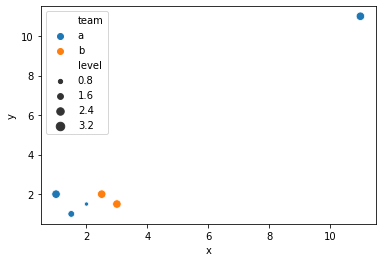

In [108]:
import seaborn as sns
sns.scatterplot(x="x", y="y", hue="team", size="level", data=cleandf)

In [109]:
# cleandf[["x", "y"]].describe()

In [110]:
# Tukey outliers limits for x values
xQ1, xQ3 = cleandf["x"].quantile([0.25, 0.75])
xIQR = xQ3 - xQ1
xlim_low = xQ1 - 1.5*xIQR
xlim_high = xQ3 + 1.5*xIQR
xlim_low, xlim_high

(-0.25, 4.75)

In [111]:
# # ALT. 2-standard deviations Z-value outlier limits
# xmean = cleandf["x"].mean()
# xstd = cleandf["x"].std()
# xlow = xmean - 2*xstd
# xhigh = xmean + 2*xstd
# xlow, xhigh

In [112]:
outliers = cleandf["x"] > 4.75
outliers

0    False
1    False
2    False
4     True
5    False
6    False
Name: x, dtype: bool

In [113]:
~outliers

0     True
1     True
2     True
4    False
5     True
6     True
Name: x, dtype: bool

In [114]:
df = cleandf[~outliers]
df

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
5,2.5,2.0,b,3.0
6,3.0,1.5,b,3.0


In [115]:
df = df.reset_index(drop=True)
df

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
3,2.5,2.0,b,3.0
4,3.0,1.5,b,3.0


In [116]:
df.equals(xmldf)

False

In [117]:
pd.testing.assert_frame_equal(df, xmldf, check_dtype=False)

### Dealing with outliers

## Load